# Welcome to the Musical Gestures Toolbox (Python) - Tutorial/Documentation

## Video visualisation
Videos can be watched as they are, but they can also be used to develop new visualisations to be used for analysis. The aim of creating such alternate displays from video recordings is to uncover features, structures and similarities within the material itself, and in relation to, for example, score material. Three useful visualisation techniques here are motion images, motion history images and motiongrams.

MGT can generate both dynamic and static visualizations, as well as some quantitative data:

- dynamic visualisations (video files)
    - motion video
    - motion history video
- static visualisations (images)
    - motion average image
    - motiongrams
    - videograms
- motion data (csv files)
    - quantity of motion
    - centroid of motion
    - area of motion

In the following we will try this ourselves, and look at the different types.

## Dependencies

If you installed musicalgestures via pip ("`pip install musicalgestures`") you should have all dependencies installed. To make sure you have all the necessary dependencies, evaluate the following line in the terminal:

`pip3 install numpy pandas matplotlib opencv-python moviepy ffmpeg ffmpeg-python scipy librosa`


## Using Google Colab
In case you are using this notebook in Google Colab, execute the following cell to install `musicalgestures`:

In [ ]:
!pip install musicalgestures

## Import

If you have all the dependencies installed, go ahead and import the `musicalgestures`.

In [1]:
import sys
sys.path.append('../') # local dev only before deploy
import musicalgestures

## The MgObject

### Simple video import

Now we create our mg (musical gestures) object. 

You can simply read a video file from the current directory this way:

In [2]:
mg = musicalgestures.MgObject('dance.avi') # from the current directory

Relative paths also work. Here is _pianist.avi_ from the __examples__ (sibling) directory:

In [3]:
mg = musicalgestures.MgObject('./examples/pianist.avi') # from a sibling directory

With absolute path:

In [4]:
import os
abs_path = os.path.abspath('dance.avi')
print(f"The absolute path to dance.avi is '{abs_path}'.")
mg = musicalgestures.MgObject(abs_path) # as absolute path

The absolute path to dance.avi is 'C:\Users\balin\Documents\GitHub\fourMs\MGT-python\musicalgestures\dance.avi'.


You can watch your video with calling the `show()` method:

In [5]:
mg.show()

MgObject('C:\Users\balin\Documents\GitHub\fourMs\MGT-python\musicalgestures\dance.avi')

## Preprocessing modules
### Trimming
When creating the object you can also already apply some preprocessing. For example you can trim the duration of the video like this:

In [6]:
# the numbers used for starttime and endtime represent time from the video's timeline in seconds
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15)
mg.show() # view the result

Trimming: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim.avi')

This will create the file *dance_trim.avi* in the same directory.

### Skipping
In order to save time, skipping every other frame, or more, in the analysis can give you a faster analysis while still getting an idea of the motion. You can for example set this by adding `skip=2`, to skip two frames before including a frame in the analysis, then skipping two again. 

In [7]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=2)
mg.show()

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip.avi')

This will create the file *dance_trim_skip.avi* in the same directory. Notice how the added suffixes at the end of the file's name can inform you about the processes the material went through. 

### It's a chain
It is also worth to note that the preprocessing modules work as a chain (- more on that below). In this case that means we first load the video file, then trim its start to 5s and its end to 15s. Then we take the resulting *dance_trim.avi* and discard 2 out of every 3 frames. (Keeping the 1st, skipping 2nd and 3rd, keeping the 4th, skipping 5th and 6th, and so on...) The resulting file of this process is *dance_trim_skip.avi*.

### Rotating

Sometimes source videos are recorded with a slightly off horizon, or with the camera mounted sideways, therefore it is desirable to rotate the video by a few (or more) degrees. We can do this by simply specifying the angle we want to rotate with for the `rotate` parameter of our MgObject:

In [8]:
# rotate by 90 degrees
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3, rotate=90)
mg.show()

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rotating video by 90 degrees: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_rot.avi')

In [9]:
# or just a little bit...
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3, rotate=5.31)
mg.show()

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rotating video by 5.31 degrees: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_rot.avi')

Again, the resulting filename *dance_trim_skip_rot.avi* will inform us about the chain of processes *dance.avi* went through.

### Adjusting contrast and brightness
During preprocessing you can also add (or remove) some contrast and brightness of your video.

Let's crank up the contrast and brighten up our *dance.avi*!

In [10]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3, rotate=90, contrast=100, brightness=20)
mg.show()

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rotating video by 90 degrees: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_rot_cb.avi')

The resulting file is now called *dance_trim_skip_rot_cb.avi*.

### Cropping

If the video frame has big areas with no motion occuring, a lot of time could be saved if only the area with motion was used in the analysis. One useful tool developed for the pre-analysis is the crop = 'auto' input, which automatically finds the area with significant motion in the input video. The movement occuring has to be above a low threshold, as to not include irrelevant background motion from shadows, dust etc. Another mode is crop = 'manual', where you can manually mark a rectangle around your area of interest.

#### Automatic cropping

In [11]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3, rotate=90, contrast=100, brightness=20, crop='auto')
mg.show()

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rotating video by 90 degrees: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_rot_cb_crop.avi')

#### Manual cropping

In [12]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3, rotate=90, contrast=100, brightness=20, crop='manual')
mg.show()

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rotating video by 90 degrees: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_rot_cb_crop.avi')

The resulting file is now called *dance_trim_skip_rot_cb_crop.avi*.

### Grayscale mode

So far all of our work preserved the color space of the source video. At the final preprocessing stage we can also choose to convert the video to grayscale with specifying `color=False` (by default `color=True`). This will not only result in a grayscale version of our source video, but also informs all future processes to work in grayscale mode. The technical benefit of this can be slightly shorter processing times at most processes, since in grayscale mode we process a single color channel per frame (instead of three channels). Try this:

In [13]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3, rotate=90, contrast=100, brightness=20, crop='auto', color=False)
mg.show()

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rotating video by 90 degrees: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete
Converting to grayscale: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_rot_cb_crop_gray.avi')

The resulting file is now called *dance_trim_skip_rot_cb_crop_gray.avi*.

### Summary of preprocessing modules
As we have seen, we can optionally apply six types of preprocessing to the video we load into our MgObject, they are (in order of execution):

- trim: Trim contents of the video based on `starttime` and `endtime`.
- skip: Skip every n frames, where n is determined by `skip`.
- rotate: Rotate the video by an angle determined by `rotate`.
- cb: Adjust contrast and brightness of the video, where `contrast` and `brightness` are the level of adjustment in percentages (meaning `contrast=0` will not apply any change). both values range from `-100` to `100`.
- crop: Crop frames in video. If `crop='auto'` the module will attempt to find the area of motion, if `crop='manual'` we can draw the cropping rectangle over the first frame.
- grayscale: Convert the video to grayscale with specifying `color=False`. This will also cause all further processes called on the MgObject to function in grayscale mode.


### Keep everything
Notice that although we can optionally apply up to four preprocessing modules to our source video, normally we only keep the final result. If you would like to keep the results of all modules, set `keep_all=True`.

In [14]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3, rotate=90, contrast=100, brightness=20, crop='auto', color=False, keep_all=True)

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rotating video by 90 degrees: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete
Converting to grayscale: |████████████████████████████████████████| 100.0% Complete


This will output six new video files:
- *dance_trim.avi*
- *dance_trim_skip.avi*
- *dance_trim_skip_rot.avi*
- *dance_trim_skip_rot_cb.avi*
- *dance_trim_skip_rot_cb_crop.avi*
- *dance_trim_skip_rot_cb_crop_gray.avi*

## Processes

In the following we will take a look at several functions to further process our videos. These include:
- `motion()`: The most frequently used function, generates a *_motion* video, horizontal and vertical motiongrams, and plots about the centroid and quantity of motion found in the video.
- `motiongrams()`: A fast shortcut to `motion()` that only outputs the motiongrams.
- `motiondata()`: A shortcut to only output the motion data as a csv file.
- `motionvideo()`: A fast shortcut to only render the *_motion* video.
- `videograms()`: Outputs the videograms.
- `history()`: Renders a *_history* video by layering the last n frames on the current frame for each frame in the video.
- `average()`: Renders an *_average* image of all frames in the video.
- `flow.sparse()`: Renders a *_sparse* optical flow video.
- `flow.dense()`: Renders a *_dense* optical flow video.
- `pose()`: Renders a *_pose* human pose estimation video, and optionally outputs the pose data as a csv file.
- `audio.spectrogram()`: Renders a figure showing the mel-scaled spectrogram of the video/audio file.
- `audio.descriptors()`: Renders a figure of plots showing spectral/loudness descriptors, including RMS energy, spectral flatness, centroid, bandwidth, rolloff of the video/audio file.
- `audio.tempogram()`: Renders a figure with a plots of onset strength and tempogram of the video/audio file.

### Motion analysis

By calling the `motion()` function, we will generate a number of files from the input video, in the same location as the source file.

These include:
- *<input_filename>_motion.avi*: The motion video that is used as the source for the rest of the analysis.
- *<input_filename>_mgx.png*: A horizontal motiongram.
- *<input_filename>_mgy.png*: A vertical motiongram.
- *<input_filename>_motion_com_qom.png*: An image file with plots of centroid and quantity of motion

We will examine each of these in a little more detail.

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_cb_crop_motion.avi')

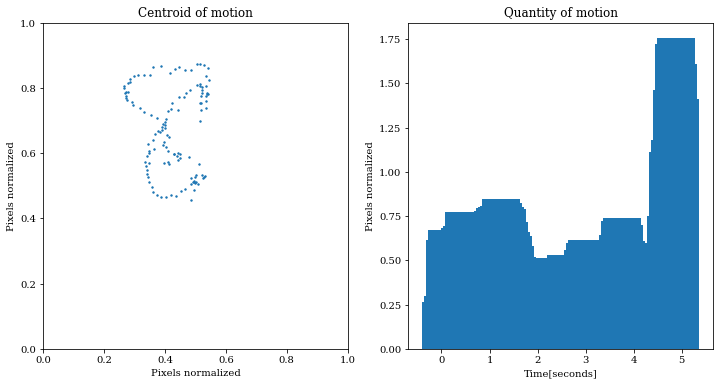

In [15]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=1, contrast=100, brightness=20, crop='auto')
mg.motion()

In [ ]:
ls # take a look at the output files

We can now look at the results with using the `key` parameter of `show()`.

In [16]:
mg.show(key='motion') # show the motion video of the preprocessed input, in this case 'dance_trim_skip_cb_crop_motion.avi'

MgObject('dance_trim_skip_cb_crop.avi')

In [17]:
mg.show(key='mgx') # show the horizontal motiongram, here 'dance_trim_skip_cb_crop_mgx.png'

MgObject('dance_trim_skip_cb_crop.avi')

In [18]:
mg.show(key='mgy') # show the vertical motiongram

MgObject('dance_trim_skip_cb_crop.avi')

In [19]:
mg.show(key='plot') # show the image of the two plots ('Centroid of motion' and 'Quantity of motion') also shown at the end of motion()

MgObject('dance_trim_skip_cb_crop.avi')

Alternatively we can display the images right here in our notebook:

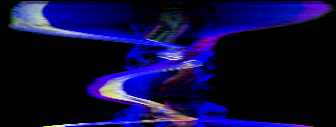

MgObject('dance_trim_skip_cb_crop.avi')

In [20]:
mg.show(key='mgx', mode='notebook') # default is mode='windowed'

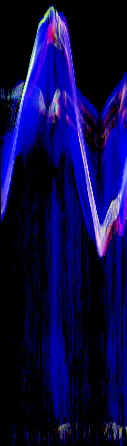

MgObject('dance_trim_skip_cb_crop.avi')

In [21]:
mg.show(key='mgy', mode='notebook')

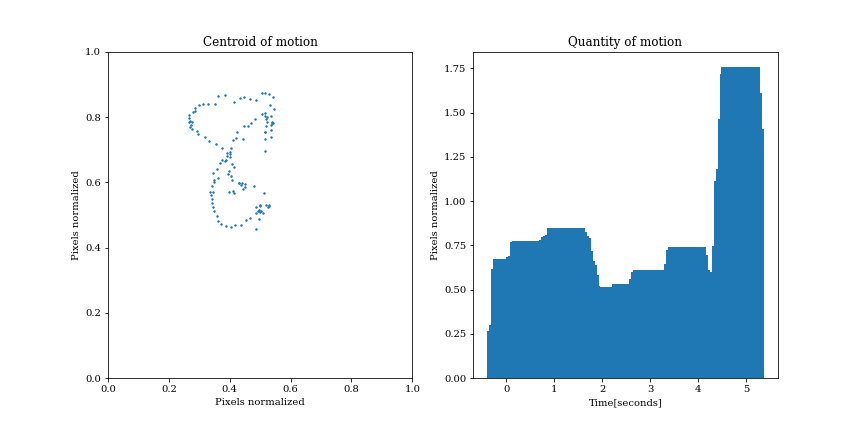

MgObject('dance_trim_skip_cb_crop.avi')

In [22]:
mg.show(key='plot', mode='notebook')

You can also configure `motion()` to output only the files you need:

In [3]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=1, contrast=100, brightness=20, crop='auto')

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete


In [24]:
# without plot
mg.motion(save_plot=False)

Rendering motion-video, -grams, -data: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_cb_crop_motion.avi')

In [25]:
# without plot and data
mg.motion(save_plot=False, save_data=False)

Rendering motion-video, -grams: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_cb_crop_motion.avi')

In [26]:
# without plot, data and motiongrams (so only the video)
mg.motion(save_plot=False, save_data=False, save_motiongrams=False)

Rendering motion-video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_cb_crop_motion.avi')

In [27]:
# without video, plot and motiongrams (so only the data)
mg.motion(save_plot=False, save_video=False, save_motiongrams=False)

Rendering motion-data: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_cb_crop.avi')

What if you only want _one_ kind of output? Then you should choose from the shortcuts below. `motionvideo()` actually renders the video much faster than `motion()` since it does not have to extract centroid and quantity of motion information.

Rendering motion video: |████████████████████████████████████████| 100.0% Complete
Rendering motion-grams: |████████████████████████████████████████| 100.0% Complete
Rendering motion-plots: |████████████████████████████████████████| 100.0% Complete
Rendering motion-data: |████████████████████████████████████████| 100.0% Complete


'dance_trim_skip_cb_crop_motion.csv'

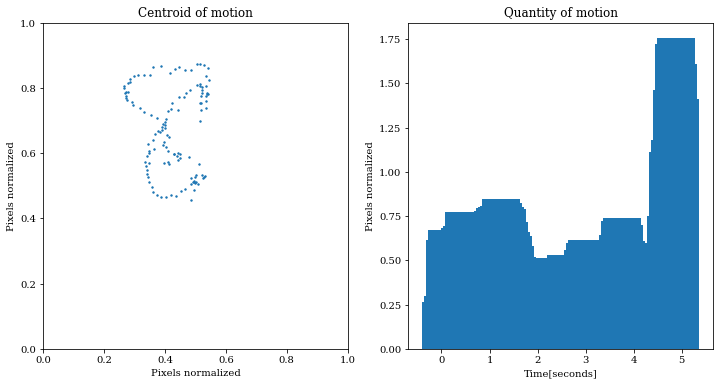

In [4]:
mg.motionvideo() # only the _motion video (super fast)
mg.motiongrams() # only the motiongrams (as slow as `motion()`)
mg.motionplots() # only the motion plots (as slow as `motion()`)
mg.motiondata() # only the motion data (as slow as `motion()`)

When it comes to the motion data, you can choose from several different formats:

In [2]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=1, contrast=100, brightness=20, crop='auto')

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete


In [3]:
# save only the data as .csv (default)
mg.motiondata()

Rendering motion-data: |████████████████████████████████████████| 100.0% Complete


'dance_trim_skip_cb_crop_motion.csv'

In [4]:
# save only the data as .tsv
mg.motiondata(data_format="tsv")

Rendering motion-data: |████████████████████████████████████████| 100.0% Complete


'dance_trim_skip_cb_crop_motion.tsv'

In [5]:
# save only the data as .txt
mg.motiondata(data_format="txt")

Rendering motion-data: |████████████████████████████████████████| 100.0% Complete


'dance_trim_skip_cb_crop_motion.txt'

In [6]:
# saving in multiple formats if data_format is a list
mg.motiondata(data_format=["txt", "csv"])

Rendering motion-data: |████████████████████████████████████████| 100.0% Complete


['dance_trim_skip_cb_crop_motion.txt', 'dance_trim_skip_cb_crop_motion.csv']

#### Filtering types
If you think there is too much noise in the output images or video, you may choose to use some other filter settings.

Filtertypes available are:

- `Regular` turns all values below `thresh` to 0.
- `Binary` turns all values below `thresh` to 0, above `thresh` to 1.
- `Blob` removes individual pixels with erosion method.

Try this:

Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Only mp4, webm and ogg videos are supported in notebook mode.
Converting to mp4: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_cb_crop_motion.avi')

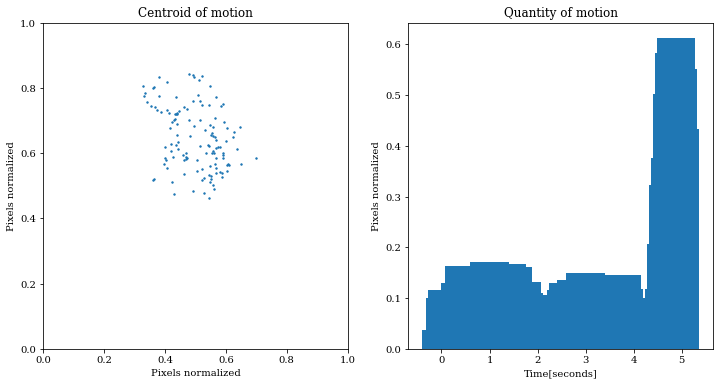

In [7]:
mg.motion(filtertype='Blob').show(mode='notebook')

#### Effects of filtering

Finding the right `thresh`old value is crucial for accurate motion extraction. Let's see a few examples.

First we import the requirements for the rest of the code.

In [ ]:
import musicalgestures

Then we import the example video.

In [2]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=10, skip=0, contrast=100, brightness=20)

Trimming: |████████████████████████████████████████| 100.0% Complete
Adjusting contrast and brightness: |████████████████████████████████████████| 100.0% Complete


First we can try to run without any threshold. This will result in a result in which much of the background noise will be visible, including traces of keyframes if the video file has been compressed.

Rendering motion-grams: |████████████████████████████████████████| 100.0% Complete


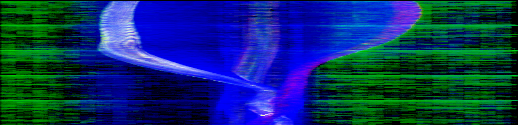

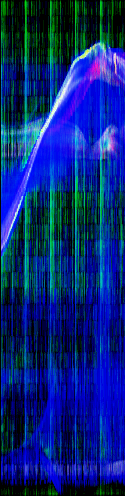

In [3]:
mg.motiongrams(thresh=0.0).show(mode='notebook')

Adding just a little bit of thresholding (0.02 here) will drastically improve the final result.

Rendering motion-grams: |████████████████████████████████████████| 100.0% Complete


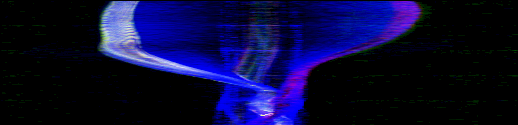

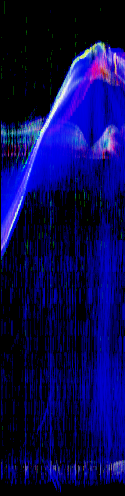

In [5]:
mg.motiongrams(thresh=0.02).show(mode='notebook')

The standard threshold value (0.1) generally works well for many types of videos.

Rendering motion-grams: |████████████████████████████████████████| 100.0% Complete


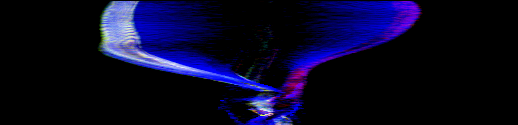

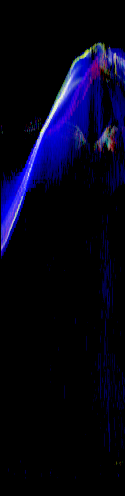

In [6]:
mg.motiongrams(thresh=0.1).show(mode='notebook')

A more extreme value (for example 0.5) will remove quite a lot of the content, but may be useful in some cases with very noisy videos.

Rendering motion-grams: |████████████████████████████████████████| 100.0% Complete


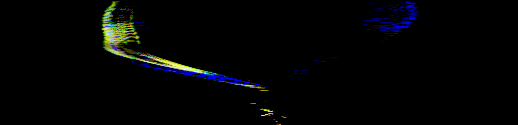

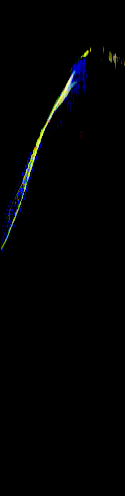

In [7]:
mg.motiongrams(thresh=0.5).show(mode='notebook')

As the above examples have shown, choosing the thresholding value is important for the final output result. While it often works to use the default value (0.1), you may improve the result by testing different thresholds.

### Videograms
Creating motiongrams can give you a quick visual overview about the motion in your video. In many cases it can be equally informative to get the videograms of your video. These images can give you a more complete overview of the whole scene, and perhaps a useful comparision to the motiongrams, since it does not remove static (non-moving) parts of the image.

Rendering horizontal videogram: |████████████████████████████████████████| 100.0% Complete
Rendering vertical videogram: |████████████████████████████████████████| 100.0% Complete


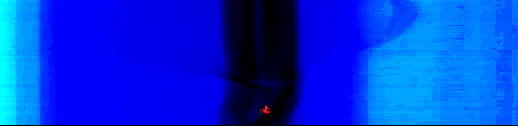

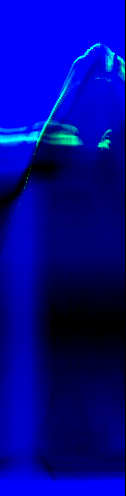

In [5]:
mg.videograms().show(mode='notebook')

### History tracking
As we have seen above, `motion()` is useful if you want to remove the still content of your video, only keeping what is different in subsequent frames. Sometimes it is also useful to visualize changes between frames in a different way: layering the last n frames on top of the current one as a video delay. With `history()` you can achieve this, optionally setting the `history length` to the number of past frames you want to see on the current frame (ie. the length of the delay).

Try this:

In [8]:
mg.history()
mg.show(key='history')

Rendering history video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_cb.avi')

By default `history_length=10`. Let's increase it to 20!

In [9]:
mg.history(history_length=20).show()

Rendering history video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_cb_history.avi')

### Motion history

To expressively visualize the trajectory of a moving content in a video, you can apply the history process on a motion video. You can do this by chaining `motion()` into `history()`. (More about chaining below!)

Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_cb_motion_history.avi')

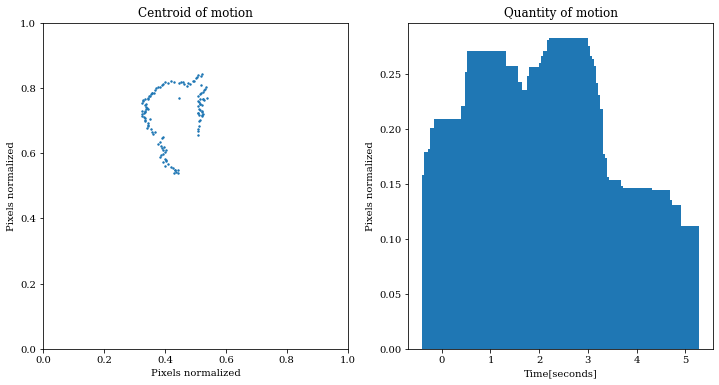

In [10]:
mg.motion().history().show()

### Average image
You can also summarize the content of a video by showing the average of all frames in a single image.

Rendering average image: |████████████████████████████████████████| 100.0% Complete


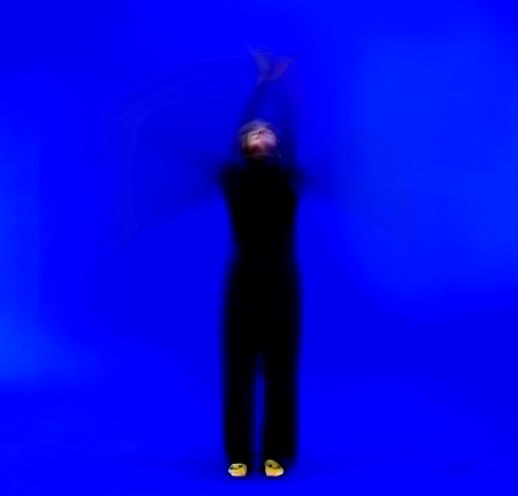

MgImage('dance_trim_cb_average.png')

In [13]:
mg.average().show(mode='notebook')

### Optical flow
It is also possible to track the direction certain points - or all points - move in a video, this is called 'optical flow'. It has two types: the *sparse optical flow*, which is for tracking a small (sparse) set of points, visualized with an overlay of dots and lines drawing the trajectory of the chosen points as they move in the video.  

In [14]:
mg.flow.sparse().show()

Rendering sparse optical flow video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_cb_flow_sparse.avi')

Note that sparse optical flow usually works well with slow and continuous movements, where the points to be tracked are not occluded by other objects throughout the course of motion.
Where spare optical flow becomes less reliable, *dense optical flow* often yields more robust results. In dense optical flow the analysis attempts to track the movement of each pixel (or more precisely groups of pixels), colorcoding them with a unique color for each unique direction.

In [15]:
mg.flow.dense().show()

Rendering dense optical flow video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_cb_flow_dense.avi')

Sparse optical flow can get confused by too fast movement (ie. too big distance between the locations of a tracked point between two consequtive frames), so it is typically advised not to have a too high `skip` value in the preprocessing stage for it to work properly.
Dense optical flow on the other hand has issues with very slow movement, which sometimes gets below the treshold of what is considered 'a movement' resulting in a blinking video, where the more-or-less idle moments are rendered completely black. If your source video contains such moments, you can try setting `skip_empty=True`, which will discard all the (completely) black frames, eliminating the binking. 

In [16]:
mg.flow.dense(skip_empty=True).show()

Rendering dense optical flow video: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_cb_flow_dense.avi')

### Pose estimation
This module uses a more advanced type of computer vision, that involves a deep neural network trained by a huge dataset of images of people (courtesy of [OpenPose](https://github.com/CMU-Perceptual-Computing-Lab/openpose)!) and tries to estimate their skeleton by tracking a set of "keypoints", which are joints on the body - for example "Head", "Left Shoulder", "Right Knee", etc. After the module runs you can take a look at the *_pose.csv* dataset, that contains the normalized XY pixel coordinates of each keypoint, and you can visualize the result with drawing a skeleton overlay over your video. You can choose from two trained models: the MPI (which is trained on the Multi-Person Dataset) or the COCO model (trained on the COCO Dataset). The module also supports GPU-acceleration, so if you have compiled openCV with CuDNN support, you can make the - otherwise rather slow - inference process run over 10 times faster!

#### The models
Since both models are quite large (~200MB each) they do not "ship" with the musicalgestures package, but we do include some convenience bash/batch scripts do download them on the fly if you need them. If the `pose()` module cannot find the model you asked for it will offer you to download it.

#### Downsampling
Running inference on large neural networks to process every pixel of every frame of your video is quite a costly operation. There is a trick however to reduce the load and this is downsampling your input image. Often times a large part of the frame is redundant and the posture of the person in the video can easily be understood on a lower resolution image as well. Downsampling can greatly speed up `pose()`, but of course it can also make its estimation less accurate if overused. The default value we use in `pose()` is `downsampling_factor=4` which produces a video with one-fourth of its original resolution before feeding it to the network.

#### Confidence threshold
The networks are not always equally confident about their guesses. Sometimes (especially with heavy downsampling) they can identify other objects in your scene as either of the keypoints of the human body we wish to track. Filtering out inconfident guesses can remove a lot of noise from the prediction. `pose()` has a normalized `threshold` parameter that is set to `0.1`. This means the network has to be at least 10% sure about its guess for us to take that prediction into account.

Below you can find a simple example of `pose()` in action. For more info check out the [documentation](https://github.com/fourMs/MGT-python/blob/master/musicalgestures/documentation/_pose.md).

In [7]:
mg.pose(downsampling_factor=1, threshold=0.05, model='mpi', device='gpu').show(mode='notebook')

Could not find weights file. Do you want to download it (~200MB)? (y/n)
y



--2020-12-14 19:13:26--  http://posefs1.perception.cs.cmu.edu/OpenPose/models/pose/mpi/pose_iter_160000.caffemodel

Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.176.37

Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.176.37|:80... connected.

HTTP request sent, awaiting response... 200 OK

Length: 205950363 (196M) [text/plain]

Saving to: 'C:/Users/balin/Documents/GitHub/fourMs/MGT-python/musicalgestures/pose/mpi/pose_iter_160000.caffemodel'





2020-12-14 19:13:58 (6.08 MB/s) - 'C:/Users/balin/Documents/GitHub/fourMs/MGT-python/musicalgestures/pose/mpi/pose_iter_160000.caffemodel' saved [205950363/205950363]



Download finished.

Rendering pose estimation video: |████████████████████████████████████████| 100.0% Complete
Only mp4, webm and ogg videos are supported in notebook mode.
Converting to mp4: |██████████████████████████████████████

MgObject('dance_trim_cb_pose.avi')

### Audio



## Chaining

So far our workflow consisted of the following steps:
- 1. Creating an MgObject which loads a video file and optionally applies some preprocessing to it.
- 2. Calling a process on the MgObject.
- 3. Viewing the result.

Something like this:

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip.avi')

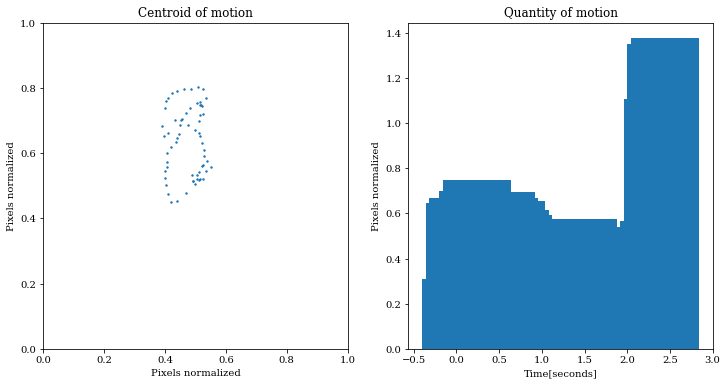

In [27]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3)
mg.motion()
mg.show(key='motion')

This is convenient if you want to apply several different processes on the same input video.

Trimming: |████████████████████████████████████████| 100.0% Complete
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


MgImage('dance_trim_skip_average.png')

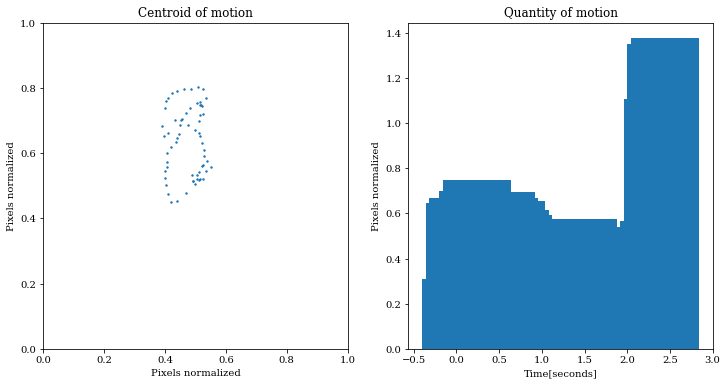

In [18]:
mg = musicalgestures.MgObject('dance.avi', starttime=5, endtime=15, skip=3)
mg.motion()
mg.history()
mg.average()

The Musical Gestures Toolbox also offers an alternative workflow in case you want to apply a proccess on the result of a previous process. Although `show()` is not really a process (ie. it does not yield a file as a result) it can provide a good example of the use of chaining:

Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip_motion.avi')

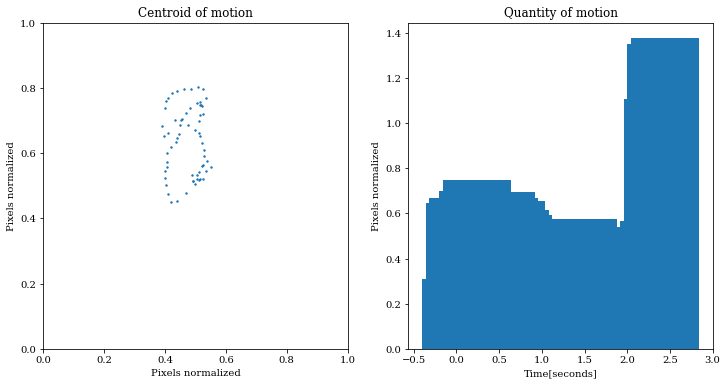

In [19]:
# this...
mg.motion().show()

Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_trim_skip.avi')

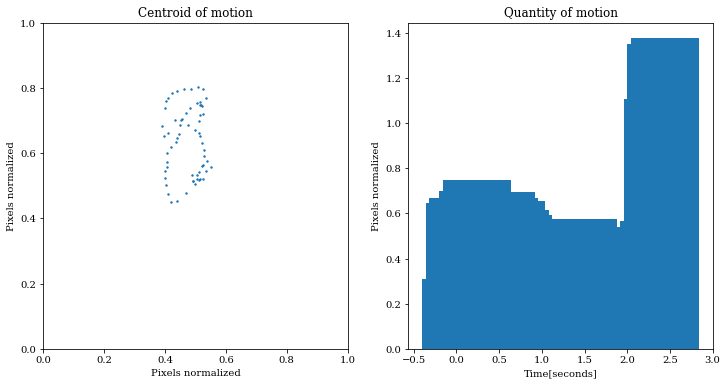

In [20]:
# ...is the equivalent of this!
mg.motion()
mg.show(key='motion')

It also works with images:

In [21]:
mg.average().show()

Rendering average image: |████████████████████████████████████████| 100.0% Complete


MgImage('dance_trim_skip_average.png')

But chaining can go further than this. How about reading (and preprocessing) a video, rendering its motion video, the motion history and the average of the motion history, with showing the *_motion_history_average.png* at the end - all as a one-liner?!

Skipping frames: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


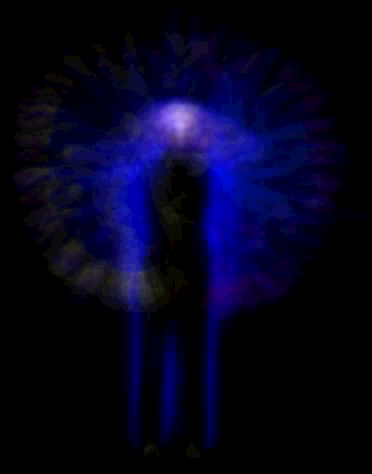

MgImage('dance_skip_crop_motion_history_average.png')

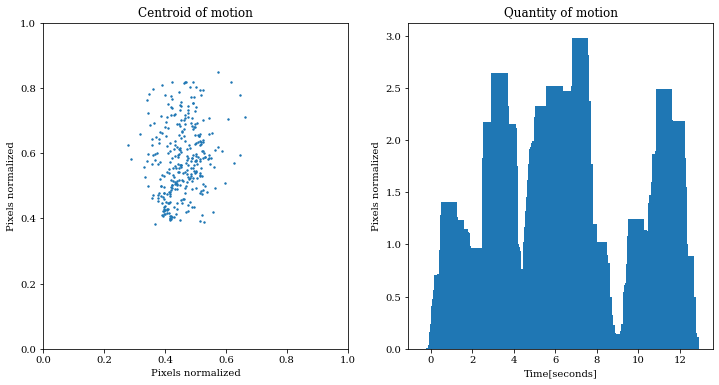

In [23]:
musicalgestures.MgObject('dance.avi', skip=4, crop='auto').motion().history().average().show(mode='notebook')

Skipping frames: |████████████████████████████████████████| 100.0% Complete
Finding area of motion: |████████████████████████████████████████| 100.0% Complete
Rendering cropped video: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


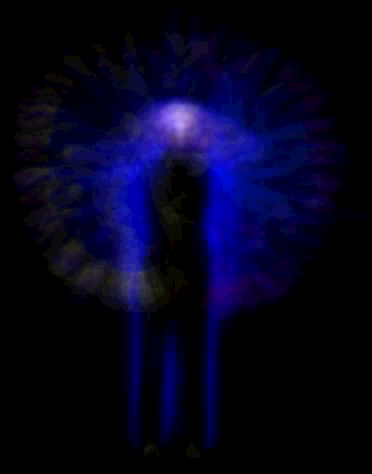

MgObject('dance_skip_crop_motion_history.avi')

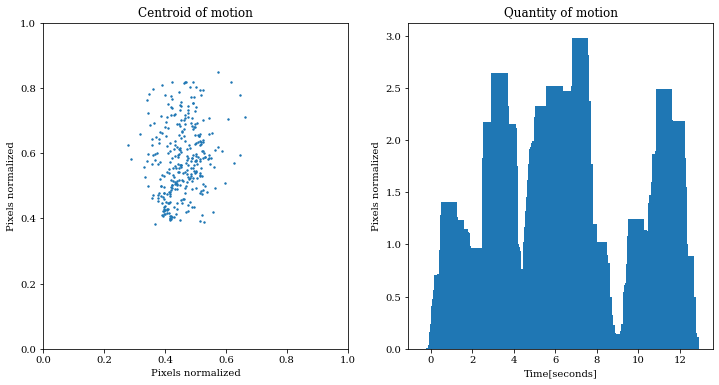

In [24]:
# equivalent without chaining
mg = musicalgestures.MgObject('dance.avi', skip=4, crop='auto')
mm = mg.motion()
mh = mm.history()
mh.average()
mh.show(key='average', mode='notebook')

Some other examples:

Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Only mp4, webm and ogg videos are supported in notebook mode.
Converting to mp4: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_skip_motion.avi')

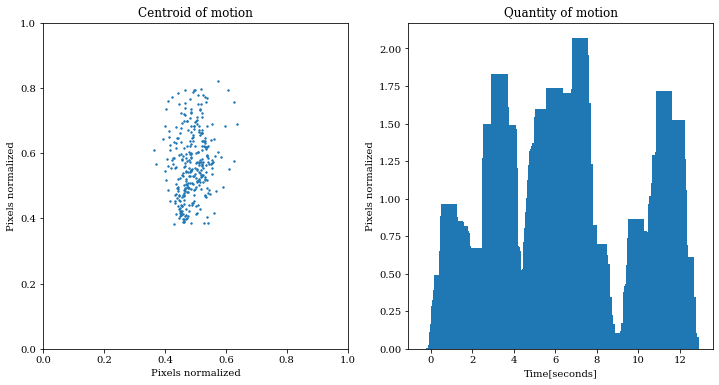

In [28]:
# rendering and viewing the motion video 
musicalgestures.MgObject('dance.avi', skip=4).motion().show(mode='notebook')

Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Only mp4, webm and ogg videos are supported in notebook mode.
Converting to mp4: |████████████████████████████████████████| 100.0% Complete


MgObject('dance_skip_motion_history.avi')

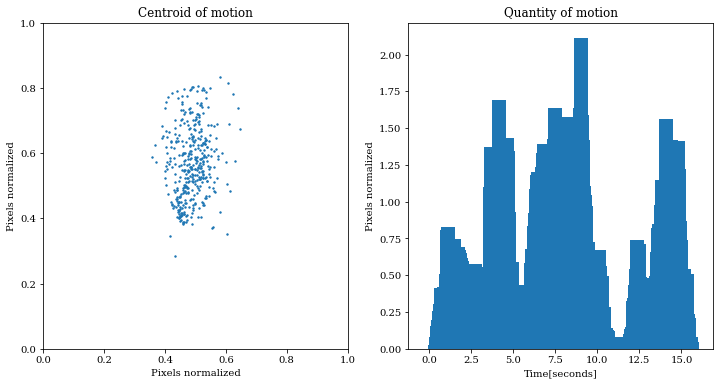

In [2]:
# rendering the motion video, the motion history video, and viewing the latter
musicalgestures.MgObject('dance.avi', skip=3).motion().history(normalize=True).show(mode='notebook')

Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


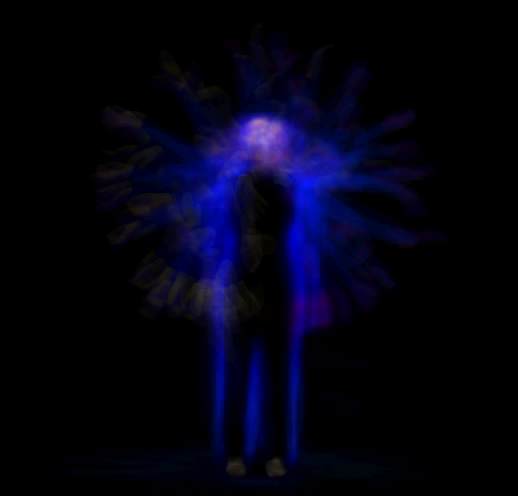

MgImage('dance_skip_motion_average.png')

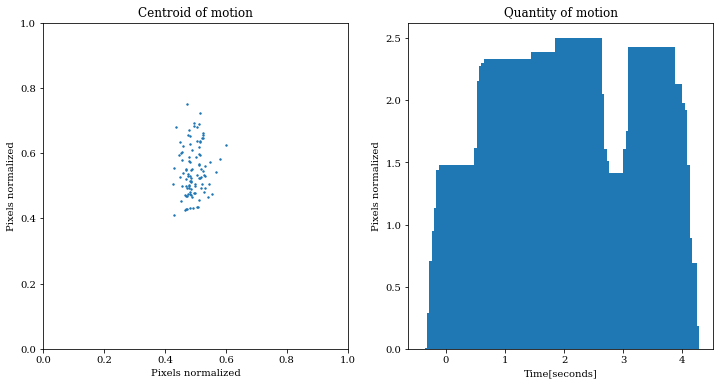

In [3]:
# rendering the motion video, the motion average image, and viewing the latter
musicalgestures.MgObject('dance.avi', skip=15).motion().average().show(mode='notebook')

Chaining can also save time (and space) when designing loops for processing a folder of videos. Here is an example:

Processing C:/Users/balin/Desktop/test-videos/bball.avi...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


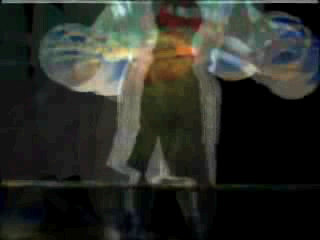

Processing C:/Users/balin/Desktop/test-videos/bball.mov...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Converting to avi: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


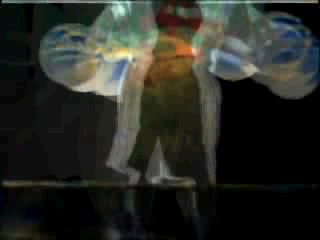

Processing C:/Users/balin/Desktop/test-videos/blading.mov...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Converting to avi: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


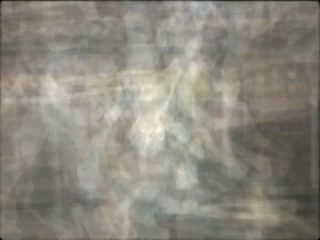

Processing C:/Users/balin/Desktop/test-videos/dance.avi...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


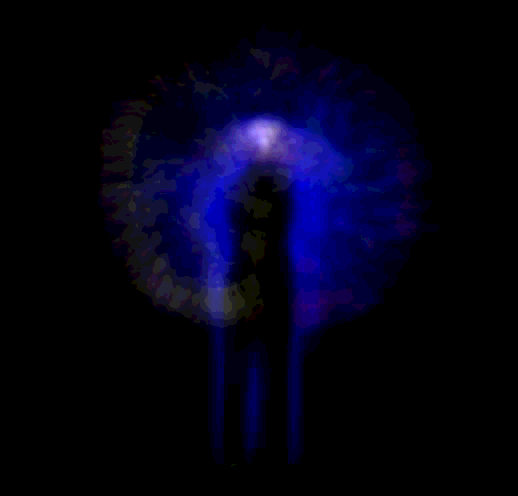

Processing C:/Users/balin/Desktop/test-videos/pianist.avi...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


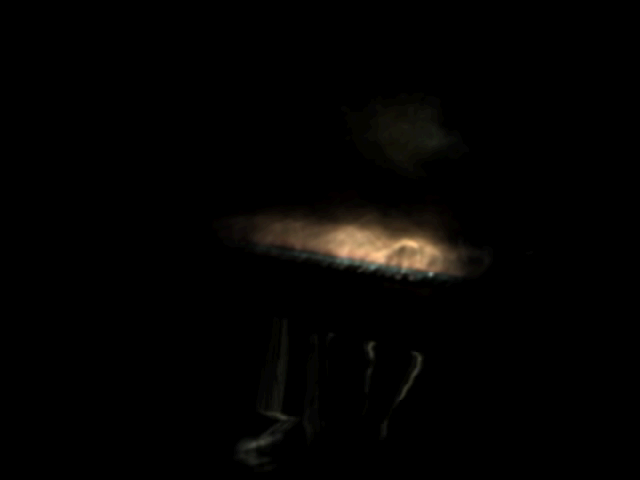

Processing C:/Users/balin/Desktop/test-videos/pianist_silent.avi...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


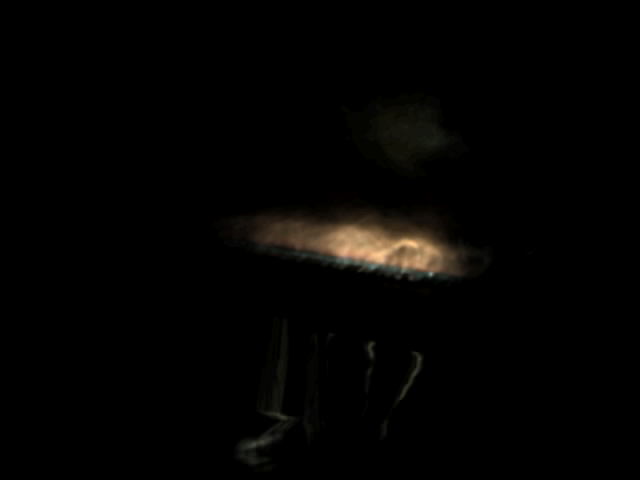

Processing C:/Users/balin/Desktop/test-videos/portrait.mov...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Converting to avi: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


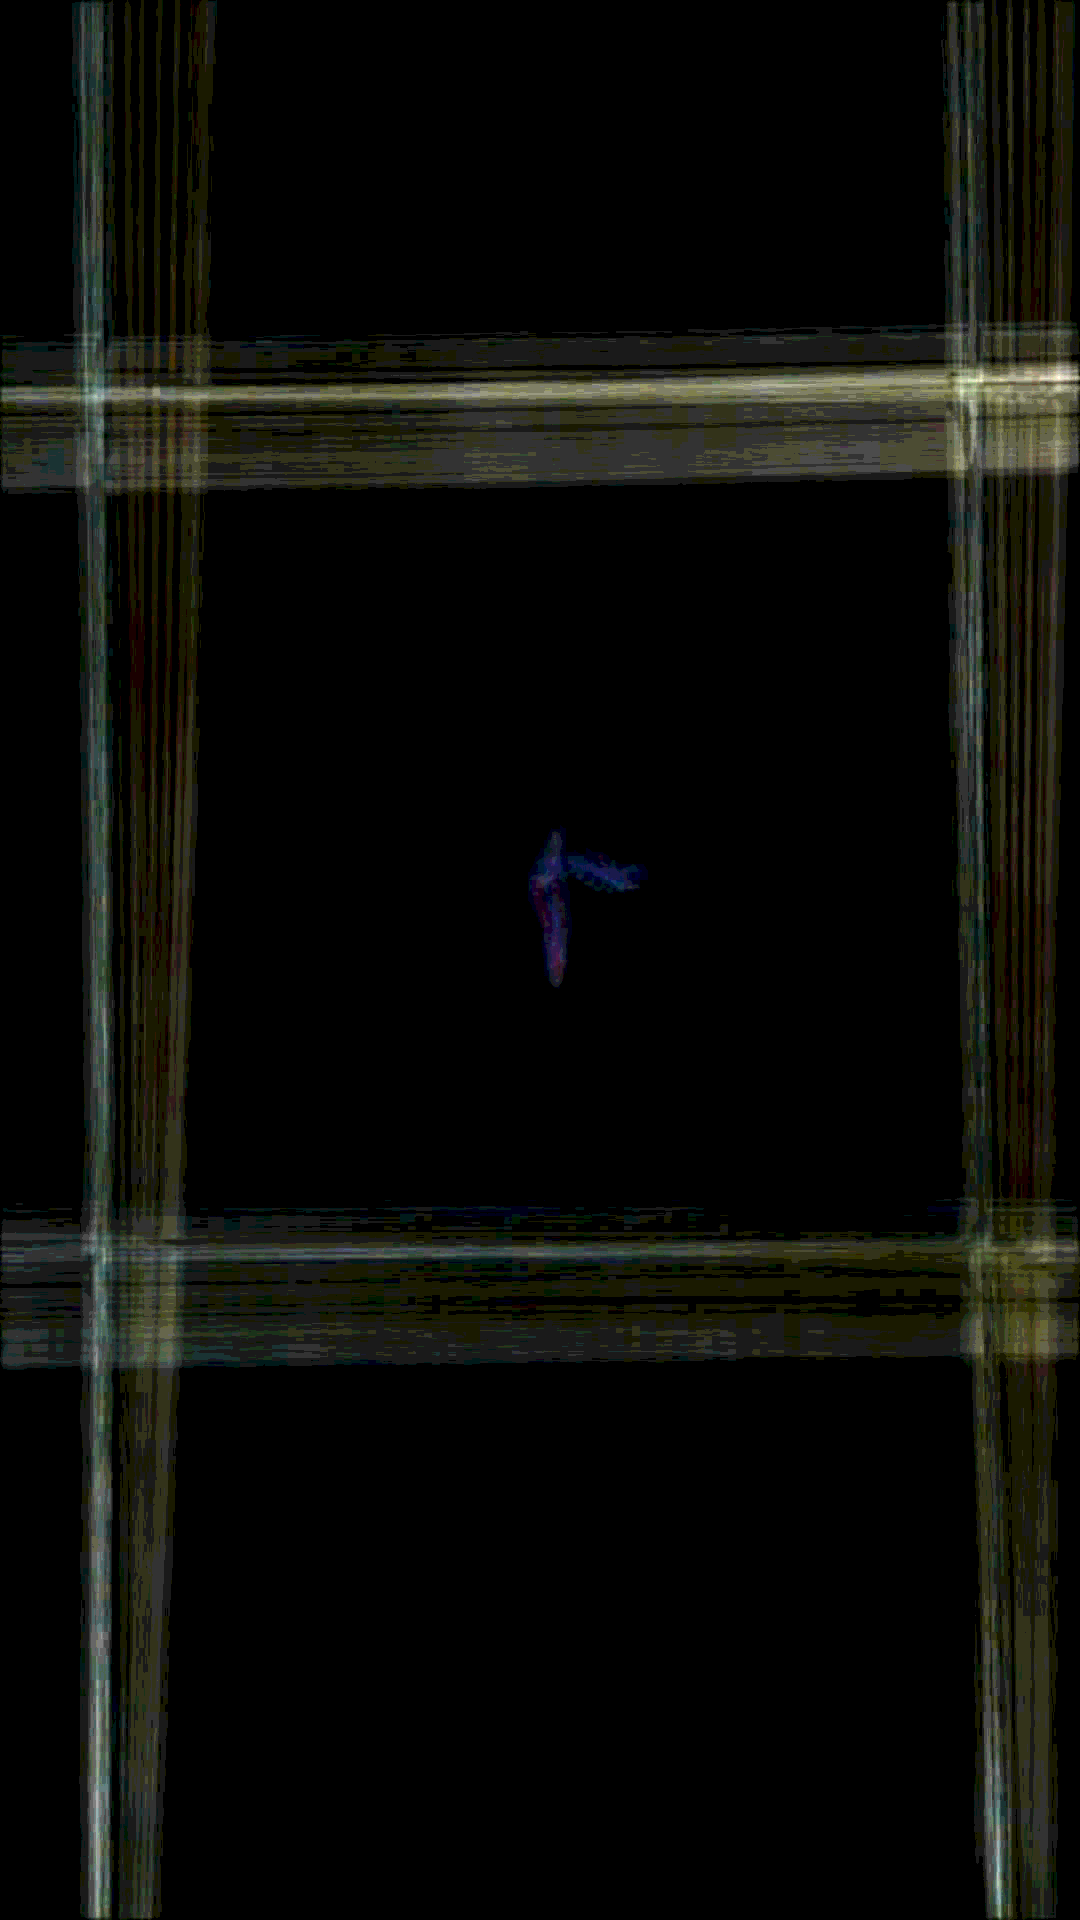

Processing C:/Users/balin/Desktop/test-videos/screencap.mp4...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Converting to avi: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


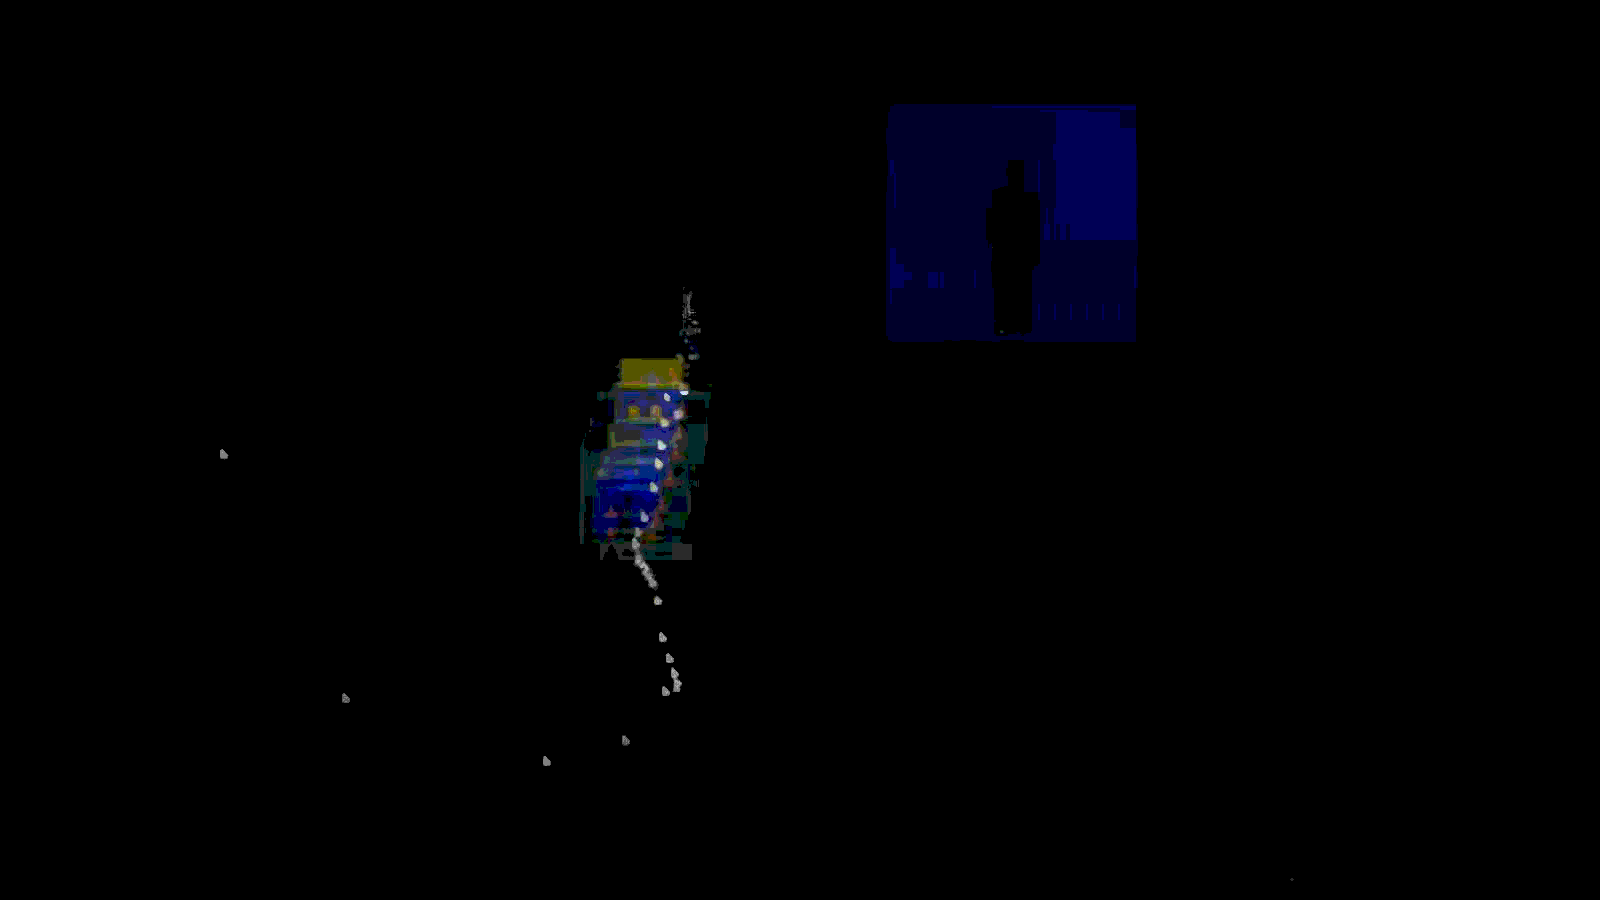

Processing C:/Users/balin/Desktop/test-videos/test.mov...
Skipping frames: |████████████████████████████████████████| 100.0% Complete
Converting to avi: |████████████████████████████████████████| 100.0% Complete
Rendering motion-video, -grams, -plots, -data: |████████████████████████████████████████| 100.0% Complete
Rendering history video: |████████████████████████████████████████| 100.0% Complete
Rendering average image: |████████████████████████████████████████| 100.0% Complete


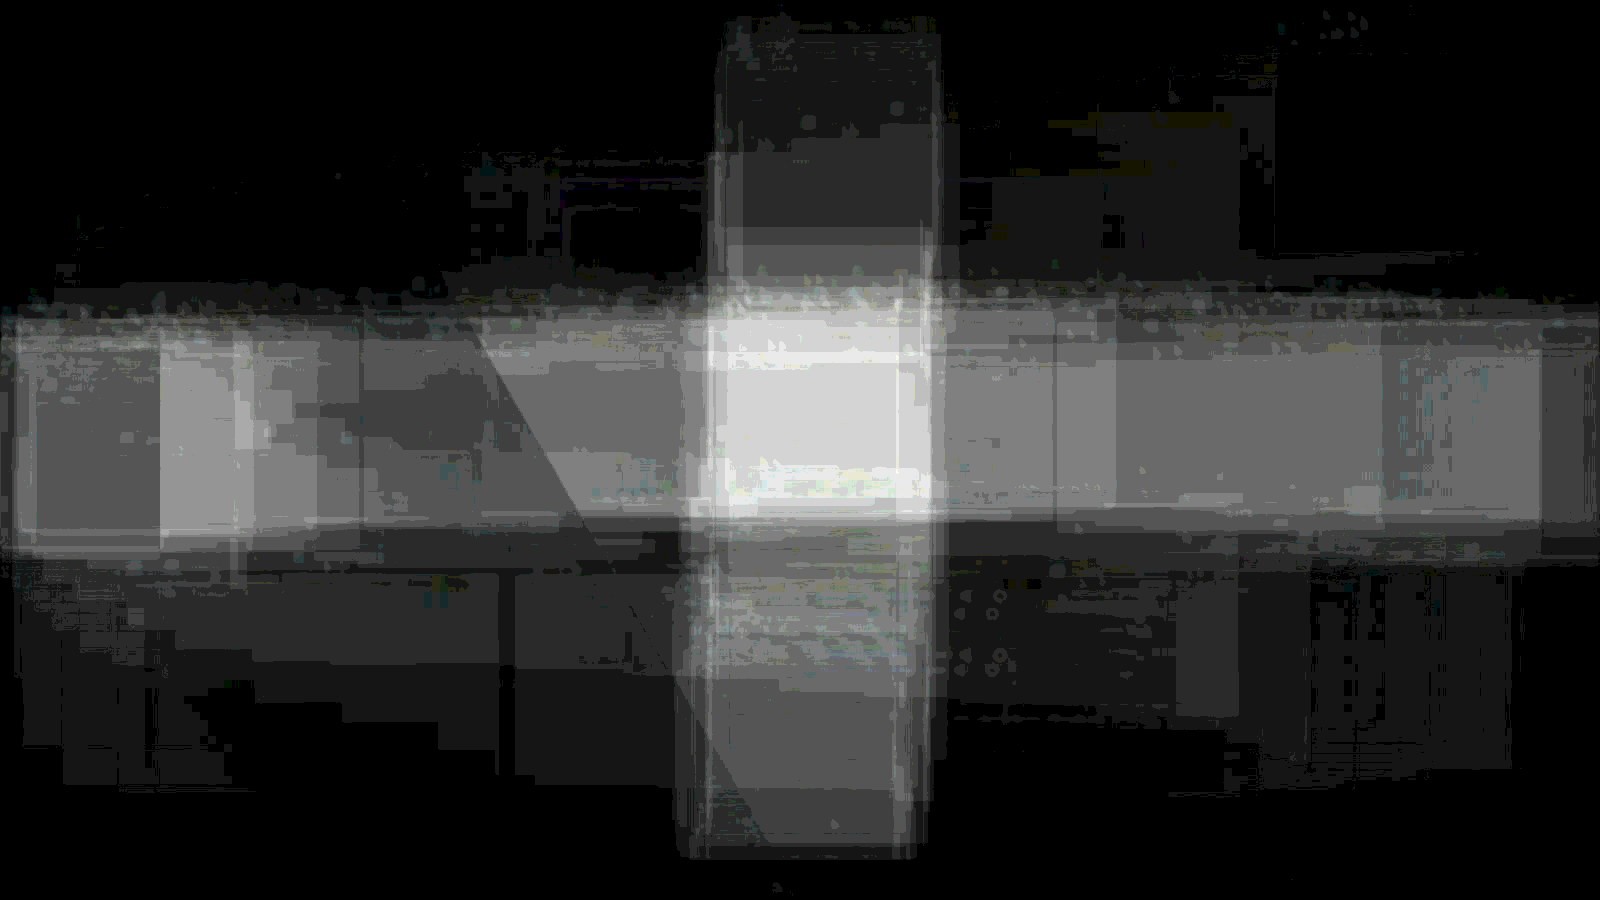

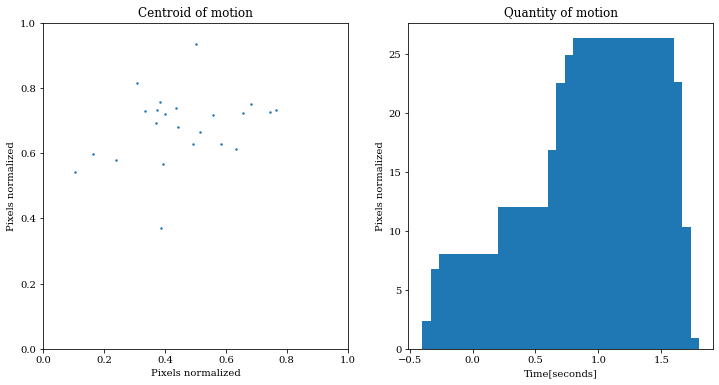

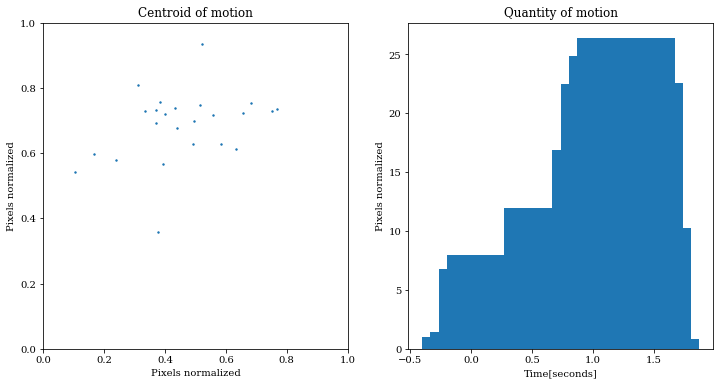

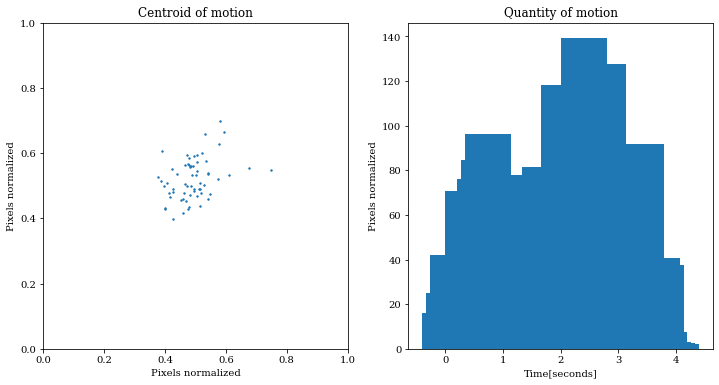

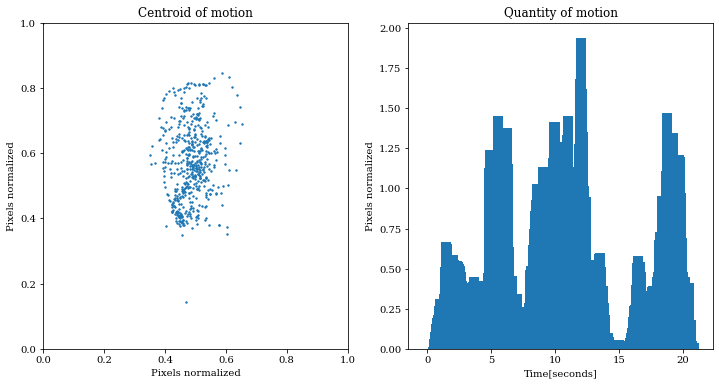

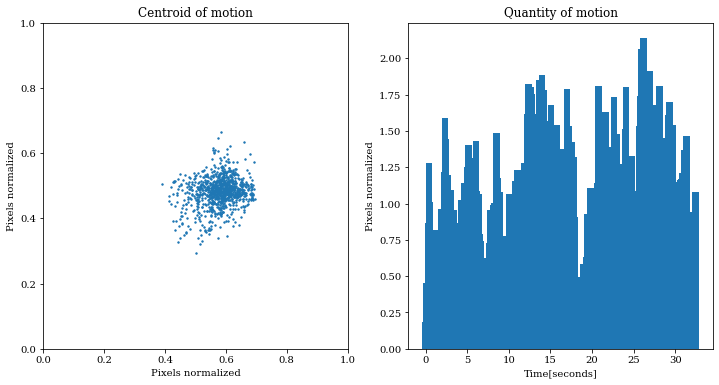

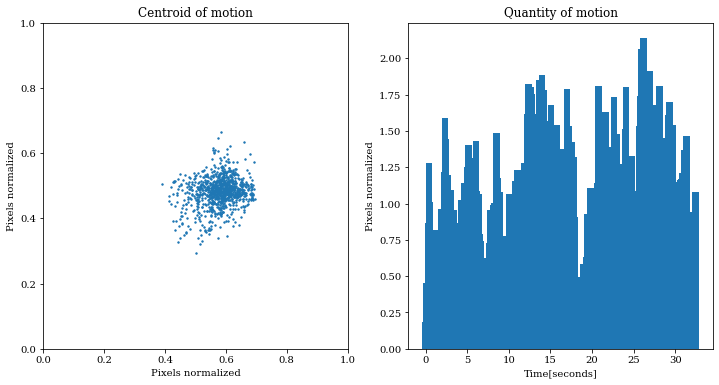

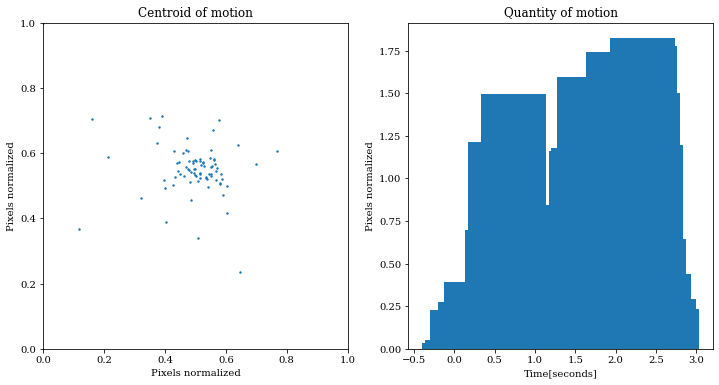

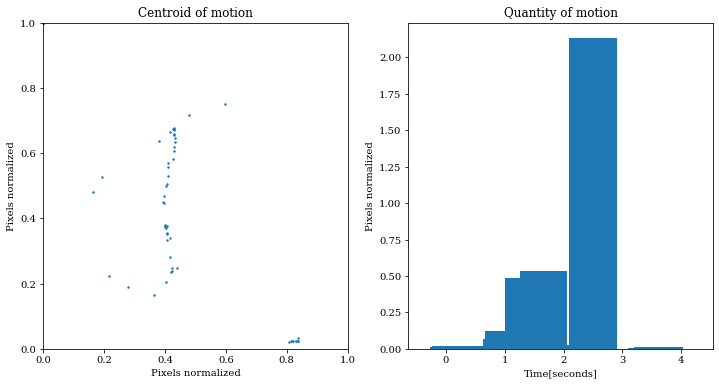

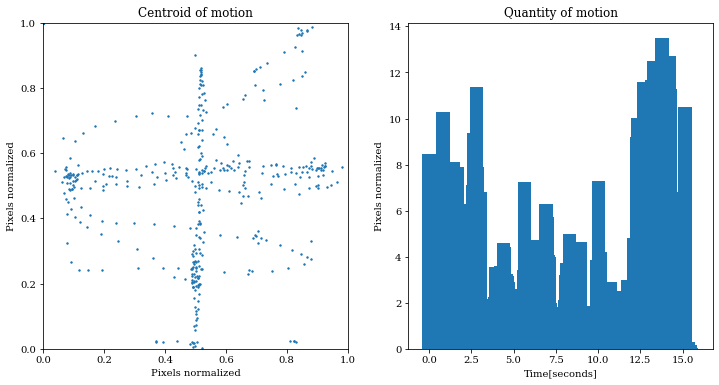

In [2]:
import os

my_videos_folder = 'C:/Users/balin/Desktop/test-videos/'

my_videos = [my_videos_folder + video for video in os.listdir(my_videos_folder) if os.path.splitext(video)[1] in ['.avi', '.mp4', '.mov', '.mkv']]

for video in my_videos:
    print(f'Processing {video}...')
    musicalgestures.MgObject(video, skip=2).motion().history().average().show(mode='notebook')